In [1]:
import sys
sys.path.append('../core/')
sys.path.append('../networks/')
from drawgan import DRAWGAN
from networks import *

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

/Users/jucheng/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
tf.reset_default_graph()

In [3]:
sess = tf.InteractiveSession()
build_encoder = Encoder(256)
build_decoder = Decoder(256)
build_discriminator = Discriminator_v3(100)
train_iters = 2
print_iters = 100

In [4]:
model =  DRAWGAN(sess, build_encoder, build_decoder,build_discriminator, read_attn = True, write_attn = True,
             enc_size = 256,dec_size = 256)

In [5]:
model.train(load_file = 'draw_gan_checkpoint_0.001_50000')

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [6]:
generated_images = model.generate()

In [7]:
generated_images.shape

(10, 256, 784)

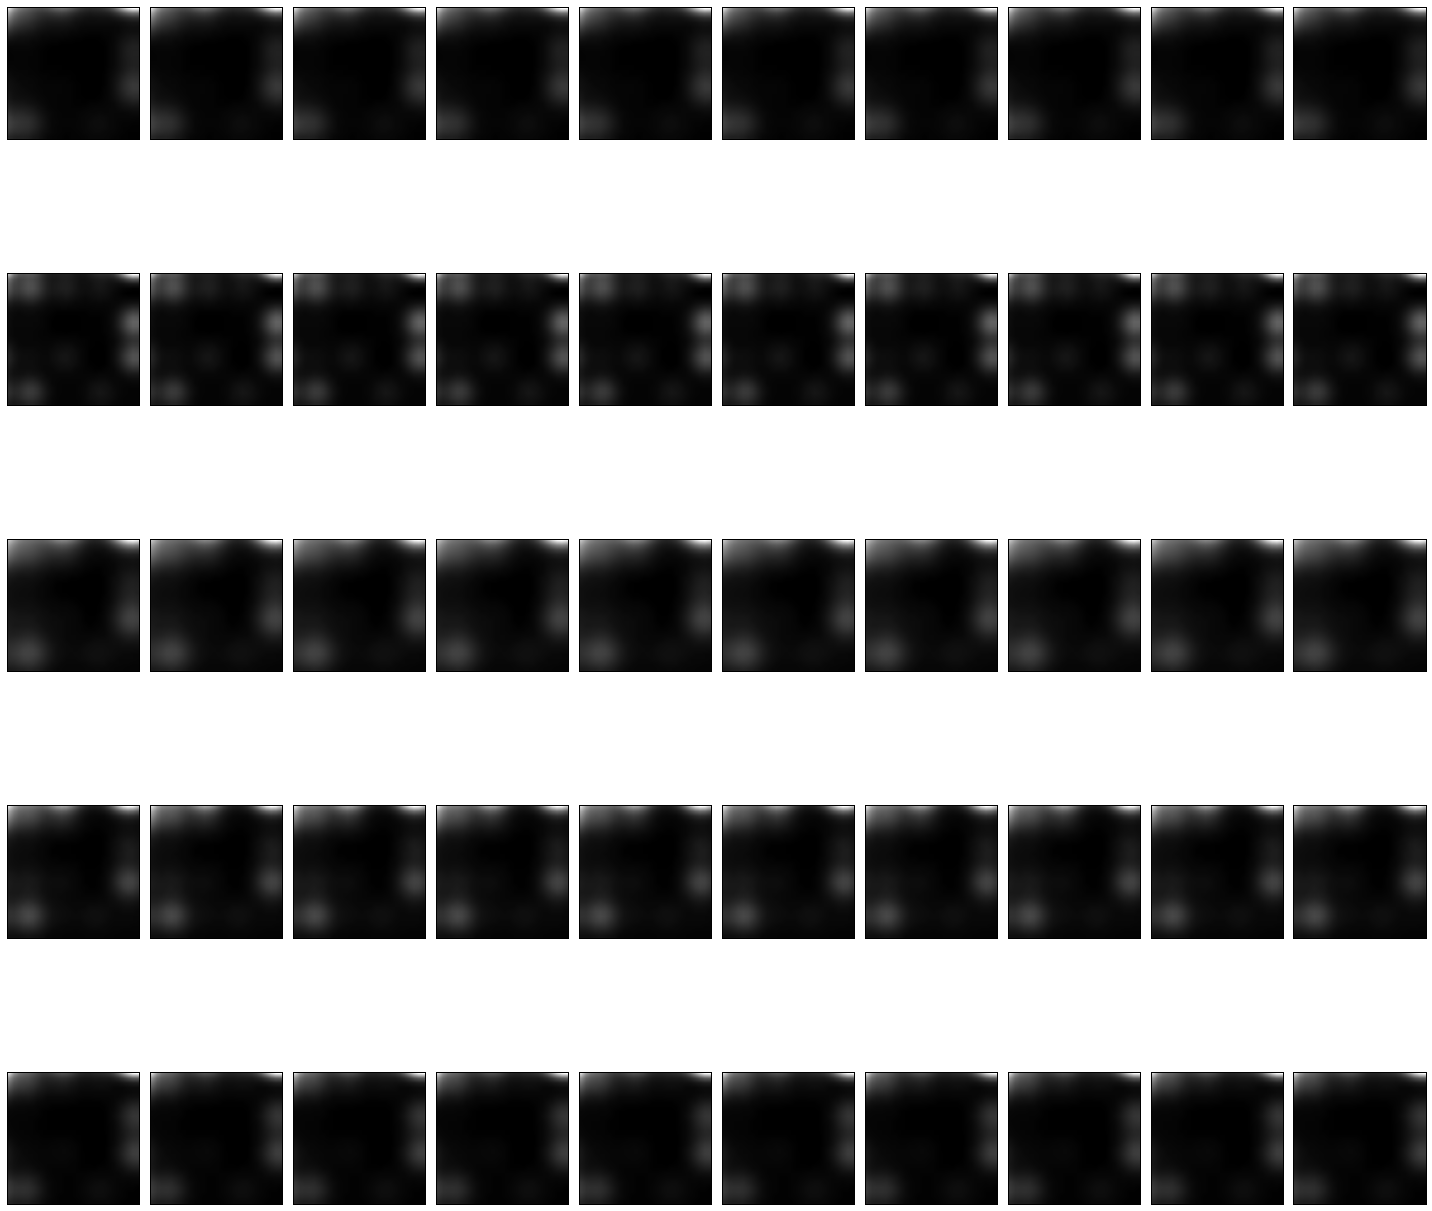

In [8]:
T = 10
num_examples = 5

plt.figure(figsize=(20,20))
for t in xrange(10):
    for n in xrange(num_examples):
        plt.subplot(num_examples, T, T* n + t + 1)
        plt.imshow(generated_images[t,n, ].reshape(28, 28), cmap='gray_r')
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
plt.show()